In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy import stats

In [ ]:
df = pd.read_csv('melbourne_house_price-clean.csv')
df['Postcode'] = df['Postcode'].astype('object')
df['Large'] = df['Rooms'].apply(lambda x: 'Yes' if x>3 else 'No')
df.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom,Bathroom,Car,...,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,year_list,month_list,Large
0,Mooroolbark,3.0,h,PI,McGrath,11.38,3138.0,3.0,1.0,2.0,...,Yarra Ranges Shire Council,-37.78156,145.30784,Eastern Victoria,8280.0,Attached Garage,870000.0,2017.0,10.0,No
1,Port Melbourne,3.0,t,S,Cayzer,3.80,3207.0,3.0,1.0,2.0,...,Melbourne City Council,-37.83710,144.94780,Southern Metropolitan,8648.0,Attached Garage,1565000.0,2016.0,4.0,No
2,Northcote,1.0,u,S,Nelson,5.50,3070.0,1.0,1.0,2.0,...,Darebin City Council,-37.78420,144.99910,Northern Metropolitan,11364.0,Carport,435000.0,2016.0,10.0,No
3,Abbotsford,4.0,h,S,Collins,2.50,3067.0,4.0,3.0,1.0,...,Yarra City Council,-37.79940,144.99650,Northern Metropolitan,4019.0,Attached Garage,1542000.0,2016.0,9.0,Yes
4,Essendon,4.0,t,S,Barry,7.50,3040.0,4.0,2.0,2.0,...,Moonee Valley City Council,-37.74180,144.89490,Western Metropolitan,9264.0,Underground,1731000.0,2017.0,11.0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20628 entries, 0 to 20627
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20628 non-null  object 
 1   Rooms          20628 non-null  float64
 2   Type           20628 non-null  object 
 3   Method         20628 non-null  object 
 4   SellerG        20628 non-null  object 
 5   Distance       20627 non-null  float64
 6   Postcode       20627 non-null  object 
 7   Bedroom        20627 non-null  float64
 8   Bathroom       20627 non-null  float64
 9   Car            20627 non-null  float64
 10  Landsize       20627 non-null  float64
 11  BuildingArea   20627 non-null  float64
 12  YearBuilt      20627 non-null  float64
 13  CouncilArea    20627 non-null  object 
 14  Latitude       20627 non-null  float64
 15  Longtitude     20627 non-null  float64
 16  Regionname     20627 non-null  object 
 17  Propertycount  20627 non-null  float64
 18  Parkin

In [ ]:
col_cat = df.select_dtypes(include='object').columns
col_cat

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea',
       'Regionname', 'ParkingArea', 'Large'],
      dtype='object')

In [ ]:
for col in col_cat:
    print(col,df[col].nunique())

Suburb 342
Type 3
Method 5
SellerG 337
Postcode 208
CouncilArea 33
Regionname 8
ParkingArea 8
Large 2


In [ ]:
df = df.drop(['Suburb','SellerG','Postcode','CouncilArea'],axis=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
y = df[['Price']]
X = df.drop('Price',axis=1)

In [ ]:
X.isnull().sum()

,0
Rooms,0
Type,0
Method,0
Distance,0
Bedroom,0
Bathroom,0
Car,0
Landsize,0
BuildingArea,0
YearBuilt,0


In [ ]:
cat_cols = X.select_dtypes(include='object')
num_cols = X.select_dtypes(exclude='object')

In [ ]:
num_cols.head()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,year_list,month_list
0,3.0,11.38,3.0,1.0,2.0,853.0,135.0,1980.0,-37.78156,145.30784,8280.0,2017.0,10.0
1,3.0,3.80,3.0,1.0,2.0,188.0,191.2,1944.8,-37.83710,144.94780,8648.0,2016.0,4.0
2,1.0,5.50,1.0,1.0,2.0,0.0,55.0,1970.0,-37.78420,144.99910,11364.0,2016.0,10.0
3,4.0,2.50,4.0,3.0,1.0,0.0,172.4,1958.4,-37.79940,144.99650,4019.0,2016.0,9.0
4,4.0,7.50,4.0,2.0,2.0,465.0,99.0,1970.0,-37.74180,144.89490,9264.0,2017.0,11.0


In [ ]:
squared_df = num_cols ** 2
squared_df = squared_df.add_suffix('^2')
num_cols = pd.concat([num_cols,squared_df],axis=1)

In [ ]:
Xp = sm.add_constant(num_cols)
Xp.head()

,const,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,...,Bathroom^2,Car^2,Landsize^2,BuildingArea^2,YearBuilt^2,Latitude^2,Longtitude^2,Propertycount^2,year_list^2,month_list^2
0,1.0,3.0,11.38,3.0,1.0,2.0,853.0,135.0,1980.0,-37.78156,...,1.0,4.0,727609.0,18225.00,3920400.00,1427.446276,21114.368365,68558400.0,4068289.0,100.0
1,1.0,3.0,3.80,3.0,1.0,2.0,188.0,191.2,1944.8,-37.83710,...,1.0,4.0,35344.0,36557.44,3782247.04,1431.646136,21009.864725,74787904.0,4064256.0,16.0
2,1.0,1.0,5.50,1.0,1.0,2.0,0.0,55.0,1970.0,-37.78420,...,1.0,4.0,0.0,3025.00,3880900.00,1427.645770,21024.739001,129140496.0,4064256.0,100.0
3,1.0,4.0,2.50,4.0,3.0,1.0,0.0,172.4,1958.4,-37.79940,...,9.0,1.0,0.0,29721.76,3835330.56,1428.794640,21023.985012,16152361.0,4064256.0,81.0
4,1.0,4.0,7.50,4.0,2.0,2.0,465.0,99.0,1970.0,-37.74180,...,4.0,4.0,216225.0,9801.00,3880900.00,1424.443467,20994.532046,85821696.0,4068289.0,121.0


In [ ]:
Xp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20627 entries, 0 to 20626
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            20627 non-null  float64
 1   Rooms            20627 non-null  float64
 2   Distance         20627 non-null  float64
 3   Bedroom          20627 non-null  float64
 4   Bathroom         20627 non-null  float64
 5   Car              20627 non-null  float64
 6   Landsize         20627 non-null  float64
 7   BuildingArea     20627 non-null  float64
 8   YearBuilt        20627 non-null  float64
 9   Latitude         20627 non-null  float64
 10  Longtitude       20627 non-null  float64
 11  Propertycount    20627 non-null  float64
 12  year_list        20627 non-null  float64
 13  month_list       20627 non-null  float64
 14  Rooms^2          20627 non-null  float64
 15  Distance^2       20627 non-null  float64
 16  Bedroom^2        20627 non-null  float64
 17  Bathroom^2       

In [ ]:
cat_cols.head()

,Type,Method,Regionname,ParkingArea,Large
0,h,PI,Eastern Victoria,Attached Garage,No
1,t,S,Southern Metropolitan,Attached Garage,No
2,u,S,Northern Metropolitan,Carport,No
3,h,S,Northern Metropolitan,Attached Garage,Yes
4,t,S,Western Metropolitan,Underground,Yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = cat_cols.columns
categorical = list(categorical_cols)

ohe = OneHotEncoder(drop='first')
encoded_array = ohe.fit_transform(df[categorical_cols])
encoded_col_names = ohe.get_feature_names_out(categorical_cols)
encoded_array = encoded_array.toarray()
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names)

In [ ]:
encoded_df

,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,...,Regionname_Western Metropolitan,Regionname_Western Victoria,ParkingArea_Carport,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground,Large_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20622,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20623,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20624,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
Xp = pd.concat([Xp,encoded_df],axis=1)
Xp.head()

,const,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,...,Regionname_Western Metropolitan,Regionname_Western Victoria,ParkingArea_Carport,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground,Large_Yes
0,1.0,3.0,11.38,3.0,1.0,2.0,853.0,135.0,1980.0,-37.78156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,3.80,3.0,1.0,2.0,188.0,191.2,1944.8,-37.83710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,5.50,1.0,1.0,2.0,0.0,55.0,1970.0,-37.78420,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,2.50,4.0,3.0,1.0,0.0,172.4,1958.4,-37.79940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,4.0,7.50,4.0,2.0,2.0,465.0,99.0,1970.0,-37.74180,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
Xp.dropna(inplace=True)
Xp.isnull().sum()

,0
const,0
Rooms,0
Distance,0
Bedroom,0
Bathroom,0
Car,0
Landsize,0
BuildingArea,0
YearBuilt,0
Latitude,0


In [ ]:
model = sm.OLS(y,Xp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1407.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:37:05   Log-Likelihood:            -2.8233e+05
No. Observations:               20627   AIC:                         5.648e+05
Df Residuals:                   20580   BIC:                         5.651e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1.901e+05   6736.373     28.223      0.000    1.77e+05    2.03e+05
Rooms                                  2.113e+05   1.41e+04     14.962      0.000    1.84e+05    2.39e+05
Distance                              -2.991e+04   1306.948    -22.887      0.000   -3.25e+04   -2.74e+04
Bedroom                               -2.201e+04   1.51e+04     -1.456      0.145   -5.17e+04    7625.691
Bathroom                               2.438e+04   1.53e+04      1.589      0.112   -5698.968    5.45e+04
Car                                    1.452e+04   8449.014      1.719      0.086   -2041.035    3.11e+04
Landsize                                 93.7494     22.966      4.082      0.000      48.735     138.764
BuildingArea                           2580.8012    186.719     13.822      0.000    2214.817    2946.785
YearBuilt                             -7.839e+04   6106.848    -12.836      0.000   -9.04e+04   -6.64e+04
Latitude                              -3.101e+08      1e+07    -30.884      0.000    -3.3e+08    -2.9e+08
Longtitude                             7.486e+08   2.65e+07     28.296      0.000    6.97e+08       8e+08
Propertycount                            10.1751      1.158      8.787      0.000       7.905      12.445
year_list                              -5.96e+07   1.91e+06    -31.161      0.000   -6.34e+07   -5.59e+07
month_list                            -3261.6096   2597.219     -1.256      0.209   -8352.364    1829.145
Rooms^2                               -2.071e+04   2341.578     -8.844      0.000   -2.53e+04   -1.61e+04
Distance^2                              474.5608     52.813      8.986      0.000     371.043     578.079
Bedroom^2                              5154.3351   2429.425      2.122      0.034     392.469    9916.201
Bathroom^2                             1.502e+04   4294.411      3.498      0.000    6604.049    2.34e+04
Car^2                                  4853.8126   2648.232      1.833      0.067    -336.933       1e+04
Landsize^2                                0.0596      0.022      2.681      0.007       0.016       0.103
BuildingArea^2                            2.4428      0.578      4.223      0.000       1.309       3.577
YearBuilt^2                              19.0051      1.559     12.194      0.000      15.950      22.060
Latitude^2                            -4.091e+06   1.33e+05    -30.825      0.000   -4.35e+06   -3.83e+06
Longtitude^2                          -2.581e+06   9.12e+04    -28.283      0.000   -2.76e+06    -2.4e+06
Propertycount^2                          -0.0005    5.6e-05     -8.852      0.000      -0.001      -0.000
year_list^2                            1.478e+04    474.228     31.170      0.000    1.39e+04    1.57e+04
month_lis

### **Backward Elimination to Remove Insignificant Variables one by one**


In [ ]:
cols = list(Xp.columns)
count=1
while len(cols)>0:
  X1 = Xp[cols]
  model = sm.OLS(y,X1).fit()
  p = model.pvalues
  p=p.drop(labels = ['const']) ### retain the constant even if it is not not significant
  pmax = max(p)
  feature_pmax = p.idxmax()
  if pmax > 0.05:
    cols.remove(feature_pmax)
    print(count, feature_pmax,'removed with pvalue: ',pmax)
    count+=1
  else:
    break

selected_cols = cols
print(selected_cols)

1 ParkingArea_Detached Garage removed with pvalue:  0.7579643273302052
2 ParkingArea_Parking Pad removed with pvalue:  0.6178190351725381
3 Regionname_Western Victoria removed with pvalue:  0.6177103469281969
4 ParkingArea_Underground removed with pvalue:  0.45808485319412817
5 Method_VB removed with pvalue:  0.4337924254273847
6 ParkingArea_Carport removed with pvalue:  0.33346717952687444
7 ParkingArea_Parkade removed with pvalue:  0.45523703085068146
8 month_list removed with pvalue:  0.21141256229435668
9 ParkingArea_Indoor removed with pvalue:  0.20132137387034196
10 ParkingArea_Outdoor Stall removed with pvalue:  0.15551884857151682
11 Bedroom removed with pvalue:  0.14551667579756922
12 Bathroom removed with pvalue:  0.16408783879781155
13 Car^2 removed with pvalue:  0.07479948016381392
14 Method_SA removed with pvalue:  0.0719674769021528
['const', 'Rooms', 'Distance', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Latitude', 'Longtitude', 'Propertycount', 'year_list', 'Rooms

In [ ]:
model  = sm.OLS(y,Xp[selected_cols]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     2021.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:37:07   Log-Likelihood:            -2.8234e+05
No. Observations:               20627   AIC:                         5.648e+05
Df Residuals:                   20594   BIC:                         5.650e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1.756e+05   5764.253     30.456      0.000    1.64e+05    1.87e+05
Rooms                                  1.971e+05   9337.561     21.106      0.000    1.79e+05    2.15e+05
Distance                              -3.007e+04   1299.550    -23.138      0.000   -3.26e+04   -2.75e+04
Car                                    2.928e+04   2767.474     10.580      0.000    2.39e+04    3.47e+04
Landsize                                 84.3955     22.495      3.752      0.000      40.304     128.487
BuildingArea                           2554.8000    181.483     14.077      0.000    2199.079    2910.521
YearBuilt                             -7.937e+04   6084.779    -13.044      0.000   -9.13e+04   -6.74e+04
Latitude                              -3.093e+08      1e+07    -30.901      0.000   -3.29e+08    -2.9e+08
Longtitude                             7.425e+08   2.45e+07     30.299      0.000    6.94e+08    7.91e+08
Propertycount                            10.1325      1.156      8.763      0.000       7.866      12.399
year_list                             -5.915e+07   1.77e+06    -33.434      0.000   -6.26e+07   -5.57e+07
Rooms^2                               -1.851e+04   1622.593    -11.406      0.000   -2.17e+04   -1.53e+04
Distance^2                              479.0628     52.516      9.122      0.000     376.127     581.999
Bedroom^2                              1798.4810    667.796      2.693      0.007     489.547    3107.415
Bathroom^2                             2.158e+04   1008.145     21.410      0.000    1.96e+04    2.36e+04
Landsize^2                                0.0678      0.022      3.110      0.002       0.025       0.111
BuildingArea^2                            2.5286      0.564      4.480      0.000       1.422       3.635
YearBuilt^2                              19.2547      1.553     12.398      0.000      16.211      22.299
Latitude^2                            -4.082e+06   1.32e+05    -30.841      0.000   -4.34e+06   -3.82e+06
Longtitude^2                           -2.56e+06   8.45e+04    -30.281      0.000   -2.73e+06   -2.39e+06
Propertycount^2                          -0.0005    5.6e-05     -8.838      0.000      -0.001      -0.000
year_list^2                            1.467e+04    438.627     33.445      0.000    1.38e+04    1.55e+04
month_list^2                            171.8401     37.675      4.561      0.000      97.994     245.687
Type_t                                -8.849e+04   5301.153    -16.692      0.000   -9.89e+04   -7.81e+04
Type_u                                -2.039e+05   5260.736    -38.752      0.000   -2.14e+05   -1.94e+05
Method_S                               3.689e+04   3750.470      9.835      0.000    2.95e+04    4.42e+04
Method_SP

In [ ]:
Xc = Xp[selected_cols]
Xc.head()

,const,Rooms,Distance,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,...,Type_u,Method_S,Method_SP,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Large_Yes
0,1.0,3.0,11.38,2.0,853.0,135.0,1980.0,-37.78156,145.30784,8280.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,3.80,2.0,188.0,191.2,1944.8,-37.83710,144.94780,8648.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,5.50,2.0,0.0,55.0,1970.0,-37.78420,144.99910,11364.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,2.50,1.0,0.0,172.4,1958.4,-37.79940,144.99650,4019.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,4.0,7.50,2.0,465.0,99.0,1970.0,-37.74180,144.89490,9264.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
y_pred = model.predict(Xc)
y_pred.head()

,0
0,7.150986e+05
1,1.489930e+06
2,3.220999e+05
3,1.455098e+06
4,8.532746e+05


### **Assumption 1 - Test of normality of residuals**

In [ ]:
y.head()

,Price
0,870000.0
1,1565000.0
2,435000.0
3,1542000.0
4,1731000.0


In [ ]:
y1 = y.copy()
y1['y_pred'] = y_pred

y1['resid'] = y1['Price'] - y1['y_pred']
y1.head()

,Price,y_pred,resid
0,870000.0,7.150986e+05,154901.395125
1,1565000.0,1.489930e+06,75069.888491
2,435000.0,3.220999e+05,112900.082554
3,1542000.0,1.455098e+06,86901.851498
4,1731000.0,8.532746e+05,877725.428778


In [ ]:
resid = model.resid
resid

,0
0,154901.395125
1,75069.888491
2,112900.082554
3,86901.851498
4,877725.428778
...,...
20622,-47422.635030
20623,-160521.400327
20624,9149.856371
20625,4769.606557


<Figure size 1000x500 with 0 Axes>

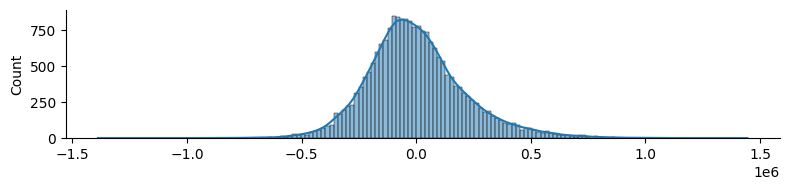

In [ ]:
plt.figure(figsize = (10,5))
sns.displot(resid, kde = True, height = 2, aspect = 4)
plt.show()

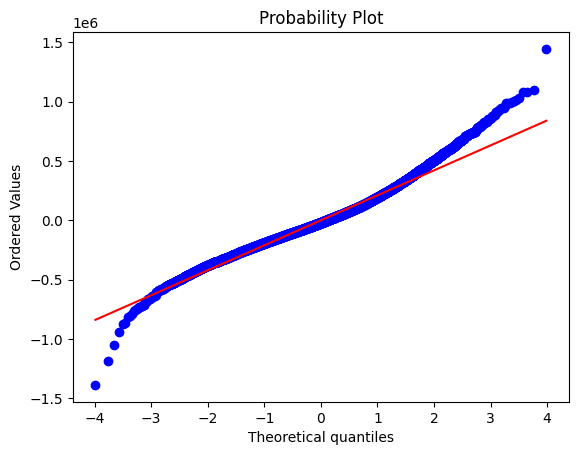

In [ ]:
###qqplot on resid

stats.probplot(resid, dist = 'norm', plot = plt)
plt.show()


#### Test of normality (Jarque Bera Test)

H0: Data is normal

H1: Data is not normal

In [ ]:
print(stats.jarque_bera(resid))

SignificanceResult(statistic=3106.3687671674543, pvalue=0.0)


Since the p val is very small (lower than sig level) we will reject H0 to conclude that residuals are not normal

### **Assumption-2: Features are not collinear (Multicollinearity)**
Here we will check for VIF and multicollinearity. VIF is multivariate but correlation is bivariate.

#### VIF Analysis: Variance Inflation Factor


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
vf = [vif(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame(vf,index = Xc.columns,columns = ['vif'])

,vif
const,0.000000e+00
Rooms,3.277857e+01
Distance,2.004539e+01
Car,1.369424e+00
Landsize,1.329041e+01
BuildingArea,2.900029e+01
YearBuilt,1.276825e+04
Latitude,3.320382e+05
Longtitude,3.499121e+06
Propertycount,1.250907e+01


### **Assumption-3: There is no heteroscedasticity**

(Residual is homoscedastic)

When there is high variance going forward, then it is hereroscadascity. initially variance will be low and it will increase going forward

**Detect heteroscedasticity** : Goldfeld test

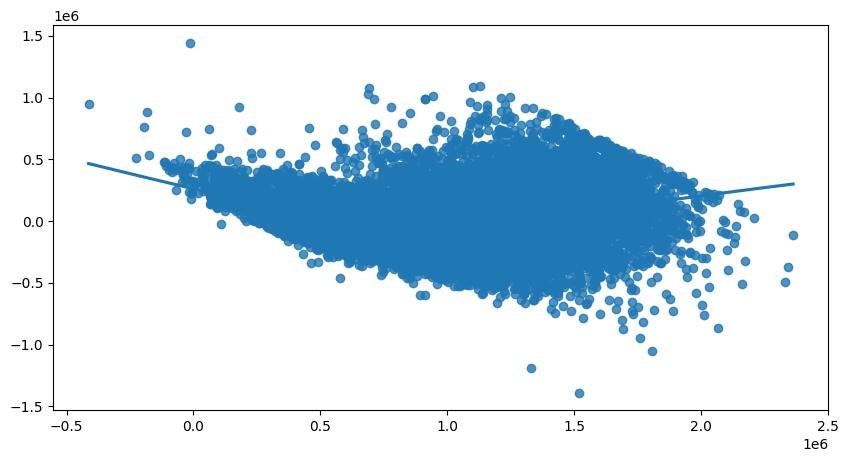

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.regplot(x=y_pred,y=resid,lowess=True, ax = ax)
plt.show()

#### **Goldfeld Test**

H0: Variance is constant across the range of data

H1: variance is not constant across the range of data

In [ ]:
import statsmodels.stats.api as sms
name = ['F statistic','p-value']
test = sms.het_goldfeldquandt(model.resid,Xc)

In [ ]:
test

(1.0339642712578523, 0.045209534506059565, 'increasing')

Since pval < significance level, we will reject the H0 to conclude that variance is not constant

### **Assumption 4: Residuals are not autocorrelated**
There residuals of consecutive features should not be correlated. Mostly applicable for time series data

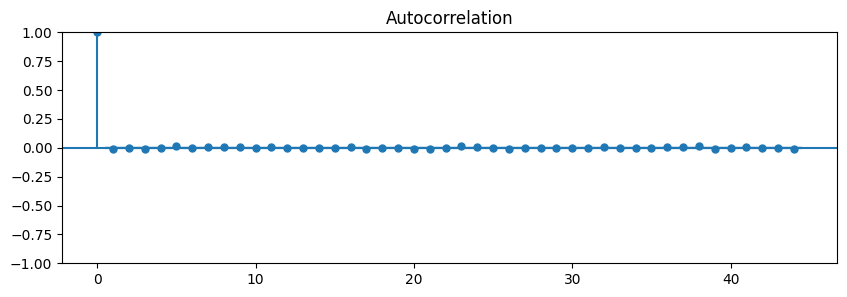

In [ ]:
import statsmodels.tsa.api as smt
fig, ax = plt.subplots(figsize = (10,3))
smt.graphics.plot_acf(resid,ax=ax)
plt.show()

#### Test for autocorrelation: Durbin Watson.
Idle value is 2. If no autocorrelation then it will be near 2. Else it will be away from 2., We can consider that there is no autocorrelation

Since this value for the model is 2.013, We can consider that there is no autocorrelation.

###**Assumption 5: Linearity of Relationship**

Note: This assumption test for the appropriateness of the model to the data. Note that it is not testing whether the fitted model is a line



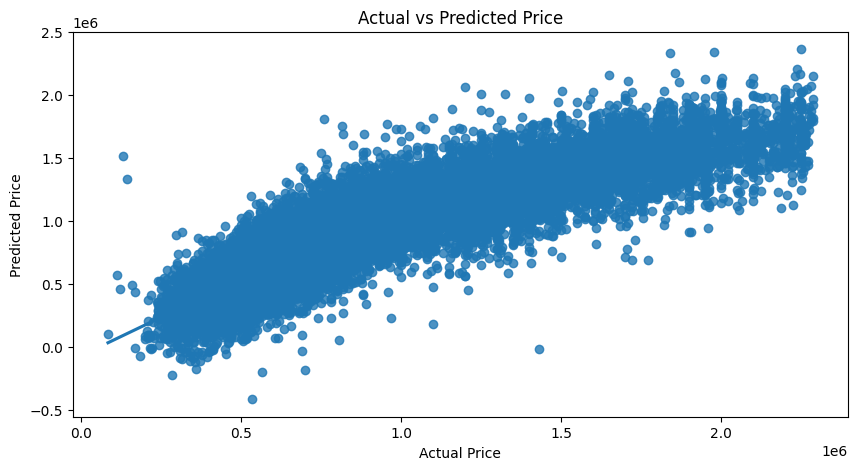

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.regplot(x = y,y = y_pred, lowess = True,ax=ax)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

#### Rainbow Test

H0: Fit of model using full sample = fit of model using central subset(Linear relationship)

H1: Fit of model using full sample is worse compared to fit of model using central subset

In [ ]:
sm.stats.diagnostic.linear_rainbow(res = model, frac=0.5)

(0.9769910809588315, 0.8812025847677059)

Since p-val (0.881)>significance level, we will accept H0 to conclude that mdoel is appropriate for the data

### **Calculate the Cost Functions**

In [ ]:
#calculate mse,mae,rmse and mape
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

print('mean absolute error: ',mean_absolute_error(y,y_pred))
print('mean squared error: ',mean_squared_error(y,y_pred))
print('root mean squared error: ',np.sqrt(mean_squared_error(y,y_pred)))
print('mean absolute percentage error: ',mean_absolute_percentage_error(y,y_pred))

mean absolute error:  161590.57658958135
mean squared error:  45379448429.95437
root mean squared error:  213024.52541891596
mean absolute percentage error:  0.19134461159313404


### **Errors for for lowest 90% of pop**

In [ ]:
y1['abs_resid'] = np.abs(y1['resid'])
y1_sorted = y1.sort_values('abs_resid')
y1_sorted.head()

,Price,y_pred,resid,abs_resid
18931,905000.0,905010.696854,-10.696854,10.696854
422,490000.0,490034.233045,-34.233045,34.233045
4278,586000.0,585955.909251,44.090749,44.090749
143,358500.0,358579.732906,-79.732906,79.732906
9441,350000.0,350081.727758,-81.727758,81.727758


In [ ]:
n = int(len(y1_sorted) * 0.9) #number of data points to keep
n

18564

In [ ]:
df_90 = y1_sorted.iloc[:n]
#df_90.head()

,Price,y_pred,resid,abs_resid
18931,905000.0,905010.696854,-10.696854,10.696854
422,490000.0,490034.233045,-34.233045,34.233045
4278,586000.0,585955.909251,44.090749,44.090749
143,358500.0,358579.732906,-79.732906,79.732906
9441,350000.0,350081.727758,-81.727758,81.727758


In [ ]:
rmse_90 = np.sqrt(np.mean(df_90['resid'] ** 2))

In [ ]:
print(f"RMSE for the lowest 90% of the population: {rmse_90}")


RMSE for the lowest 90% of the population: 154797.1790869769
